Logistic regression :
Accuracy score : 0.8125
Precision score : 0.8148148148148148

K Nearest Neighbours : 
Accuracy score : 0.9
Precision score : 0.8333333333333334





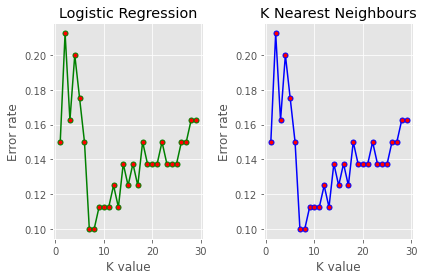

'\nAccording to the performance metrics, The KNN algorithm provides a better accuracy score \nand precision score than that of Logistic Regression . \n\nLogistic regression :\nAccuracy score : 0.8125\nPrecision score : 0.8148148148148148\n\nK Nearest Neighbours : \nAccuracy score : 0.9\nPrecision score : 0.8333333333333334\n\n'

In [5]:
'''
Project 2:
 
For given “logistic_data.csv” dataset, determine the classification model.
a)	Using logistic regression algorithm.
b)	Using KNN algorithm
c)	Compare (a) and (b) and state which gives better performance in terms of metric parameter such as accuracy score, precision score, recall.

'''

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
from sklearn.neighbors import KNeighborsClassifier

# Import data set
dataset=pd.read_csv('../Data/Logistic Data.csv')


# To create feature matrix and dependent variable vector
a=dataset.iloc[:,:-1].values
b=dataset.iloc[:,-1].values

# Replace the missing data
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(a[:,:])
a[:,:]=imputer.transform(a[:,:])

# Spiliting of data set into training and testing set
atrain,atest,btrain,btest=train_test_split(a,b,test_size=0.2,random_state=1)

# Feature scaling
sc=StandardScaler()
atrain=sc.fit_transform(atrain)
atest=sc.fit_transform(atest)


# Using logistic regression algorithm.
# Training the classification model
LoR=LogisticRegression(random_state=0)
LoR.fit(atrain,btrain)

# Testing the linear model
bestimated=LoR.predict(atest)

# Performance matrix
print("Logistic regression :")
print(f"Accuracy score : {accuracy_score(btest,bestimated)}")
print(f"Precision score : {precision_score(btest,bestimated)}")

error_rate_LoR=[]
for i in range(1,30):
    KC=KNeighborsClassifier(n_neighbors=i)
    KC.fit(atrain,btrain)
    bpred_i=KC.predict(atest)
    error_rate_LoR.append(np.mean(bpred_i!=btest))


# By using KNN Algorithm
# Build my KNN classification model
# Training the classification model
KC=KNeighborsClassifier(n_neighbors=7,weights='uniform',p=2)
KC.fit(atrain,btrain)

# Testing the linear model
bestimated=KC.predict(atest)

# Performance matrix
print("\nK Nearest Neighbours : ")
print(f"Accuracy score : {accuracy_score(btest,bestimated)}")
print(f"Precision score : {precision_score(btest,bestimated)}")
print("\n\n")

error_rate_KNN=[]
for i in range(1,30):
    KC=KNeighborsClassifier(n_neighbors=i)
    KC.fit(atrain,btrain)
    bpred_i=KC.predict(atest)
    error_rate_KNN.append(np.mean(bpred_i!=btest))


# Plotting the Data
# Plotting the Error Graph of both the Algorithms  
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title("Logistic Regression")
ax1.plot(range(1,30),error_rate_LoR,marker='o',markerfacecolor='red',markersize=5,color = 'green')
ax1.set_xlabel('K value')
ax1.set_ylabel('Error rate')

ax2.set_title("K Nearest Neighbours")
ax2.plot(range(1,30),error_rate_KNN,marker='o',markerfacecolor='red',markersize=5,color = 'b')
ax2.set_xlabel('K value')
ax2.set_ylabel('Error rate')

fig.tight_layout()
plt.show()



'''
According to the performance metrics, The KNN algorithm provides a better accuracy score 
and precision score than that of Logistic Regression . 

Logistic regression :
Accuracy score : 0.8125
Precision score : 0.8148148148148148

K Nearest Neighbours : 
Accuracy score : 0.9
Precision score : 0.8333333333333334

'''
